## Import Data

In [45]:
# Setup Packages
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

%matplotlib inline

# Used for auto-formatting code
# terminal - pip install nb_black
%load_ext nb_black

# Display all rows and columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [46]:
house_data = pd.read_csv("train.csv")

<IPython.core.display.Javascript object>

In [47]:
var_toremove = [
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Heating",
    "HeatingQC",
    "CentralAir",
    "Electrical",
    "KitchenQual",
    "Functional",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PavedDrive",
    "PoolQC",
    "Fence",
    "MiscFeature",
    "SaleType",
    "SaleCondition",
]


house_data.drop(var_toremove, axis=1, inplace=True)

<IPython.core.display.Javascript object>

## Data Manipulation

### Response Variable - Log Transform
- Transformation validated in DataExploration Notebook

In [48]:
house_data["SalePrice_log"] = np.log(house_data["SalePrice"])

<IPython.core.display.Javascript object>

### Impute Continuous Variables
- Imputation with mean validated in DataExploration Notebook

In [49]:
# LotFrontage
avg_LotFrontage = house_data['LotFrontage'].mean()
house_data['LotFrontage'].fillna(avg_LotFrontage, inplace=True)

# MasVnrArea
avg_MasVnrArea = house_data['MasVnrArea'].mean()
house_data['MasVnrArea'].fillna(avg_MasVnrArea, inplace=True)


<IPython.core.display.Javascript object>

### Impute Categorical Variables

In [50]:
# #Basement Related Variables

# #Locate NA indices
# bsmt_null_list=np.array(house_data['BsmtCond'][house_data['BsmtCond'].isnull()].index)
# bsmt_null_list2=np.array(house_data['BsmtQual'][house_data['BsmtQual'].isnull()].index)
# bsmt_null_list3=np.array(house_data['BsmtExposure'][house_data['BsmtExposure'].isnull()].index)
# bsmt_null_list4=np.array(house_data['BsmtFinType1'][house_data['BsmtFinType1'].isnull()].index)
# bsmt_null_list5=np.array(house_data['BsmtFinType2'][house_data['BsmtFinType2'].isnull()].index)

# #Impute NA values with 'None'
# house_data['BsmtQual'].fillna('None', inplace=True)
# house_data['BsmtCond'].fillna('None', inplace=True)
# house_data['BsmtExposure'].fillna('None', inplace=True)
# house_data['BsmtFinType1'].fillna('None', inplace=True)


<IPython.core.display.Javascript object>

In [51]:
# #Electrical Fill with Mode
# house_data['Electrical'].fillna(house_data['Electrical'].mode()[0], inplace=True)


<IPython.core.display.Javascript object>

In [52]:
# #Fire Place Quality
# fireplace_null_list=np.array(house_data['FireplaceQu'][house_data['FireplaceQu'].isnull()].index)
# house_data['FireplaceQu'].fillna('None', inplace=True)


<IPython.core.display.Javascript object>

In [53]:

# #Garage Related Variables
# house_data['GarageType'].fillna('None', inplace=True)
# house_data['GarageFinish'].fillna('None', inplace=True)
# house_data['GarageQual'].fillna('None', inplace=True)


<IPython.core.display.Javascript object>

## Remove Outliers

In [54]:
# Separate predictors by numerical and categorical features
from functions_file import categorize

cat_features, num_cont_features, num_disc_features = categorize(house_data)

<IPython.core.display.Javascript object>

In [55]:
# Determine Outliers of Continuous Data
def outlier_idx(data, thresh):

    avg = data.mean()  # calc average
    stdev = data.std()  # calc standard deviation
    z_score = (data - avg) / stdev  # calc z_score
    ol = z_score > thresh  # boolean (True=outlier)
    outlier_idx = data.index[ol]  # indexes of outliers

    return list(outlier_idx)

<IPython.core.display.Javascript object>

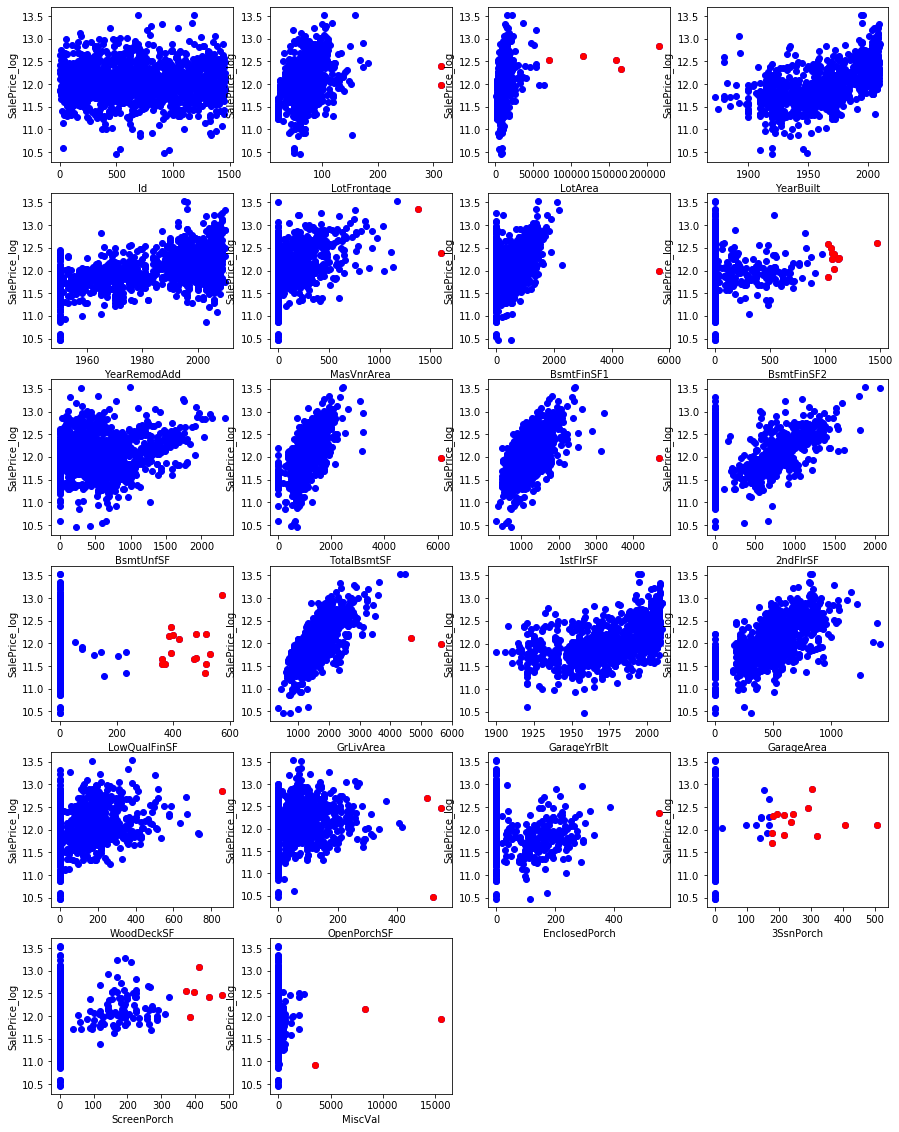

<IPython.core.display.Javascript object>

In [56]:
# Plot Outliers
plt.figure(figsize=(15, 20))
for idx, col in enumerate(num_cont_features):
    outliers = outlier_idx(house_data[col], 6)  # outlier indices
    plt.subplot(math.ceil(len(num_cont_features) / 4), 4, idx + 1)
    plt.scatter(x=house_data[col], y=house_data["SalePrice_log"], c="blue")
    plt.scatter(
        x=house_data[col][outliers], y=house_data["SalePrice_log"][outliers], c="red"
    )
    plt.ylabel("SalePrice_log")
    plt.xlabel(col)

In [57]:
# Identify outliers within listed variables
vars_outliers = (
    "LotFrontage",
    "LotArea",
    "MasVnrArea",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "GrLivArea",
)

outlier_store = {}
thresh = 6  # outlier > +6std away from mean
for idx, col in enumerate(vars_outliers):
    outliers = outlier_idx(house_data[col], thresh)  # outlier indices
    if len(outliers) > 0:
        outlier_store[col] = outliers  # only store features with outliers

<IPython.core.display.Javascript object>

In [58]:
# Remove outlier observations
res = []
for key in outlier_store.keys():
    res.append(outlier_store[key])
outlier_idx = [item for sublist in res for item in sublist]

house_data.drop(outlier_idx, inplace=True)

<IPython.core.display.Javascript object>

## Feature Engineering

In [59]:
#Total area of house = Above ground living area + basement living area
house_data['TotalSF'] = house_data['GrLivArea'] + house_data['TotalBsmtSF']


<IPython.core.display.Javascript object>

In [60]:
#Age = Year sold - year built
house_data['Age'] = house_data['YrSold'] - house_data['YearBuilt']


<IPython.core.display.Javascript object>

In [61]:
#AgeRemod = Year sold - year remodeled
house_data['AgeRemod'] = house_data['YrSold'] - house_data['YearRemodAdd']


<IPython.core.display.Javascript object>

In [62]:
#Total porch SF = OpenPorchSF + EnclosedSF + 3SsnPorch + ScreenPorch
house_data['TotPorchSF'] = house_data['OpenPorchSF'] + house_data['EnclosedPorch'] + house_data['3SsnPorch'] + house_data['ScreenPorch']


<IPython.core.display.Javascript object>

In [63]:
#Total bathrooms = Full bath + 0.5*Halfbath (for both house and basement)
house_data['TotBaths'] = house_data['FullBath'] + house_data['BsmtFullBath'] + 0.5*house_data['HalfBath'] + 0.5*house_data['BsmtHalfBath']


<IPython.core.display.Javascript object>

In [64]:
# Total number of car garage = 1, 2, 3+ cars
house_data["TotCarGarage"] = house_data["GarageCars"]
house_data.loc[house_data["GarageCars"] >= 3, "TotCarGarage"] = 3

<IPython.core.display.Javascript object>

In [65]:
#Has Second Floor = 0 (no) or 1 (yes)
house_data['Has2ndFl'] = pd.Series(len(house_data['2ndFlrSF']), index=house_data.index)
house_data['Has2ndFl'] = 0 
house_data.loc[house_data['2ndFlrSF'] > 0,'Has2ndFl'] = 1


<IPython.core.display.Javascript object>

In [66]:
#Has Porch = 0 (no) or 1 (yes)
house_data['HasPorch'] = pd.Series(len(house_data['TotPorchSF']), index=house_data.index)
house_data['HasPorch'] = 0 
house_data.loc[house_data['TotPorchSF'] > 0,'HasPorch'] = 1


<IPython.core.display.Javascript object>

In [67]:
#Has Deck = 0 (no) or 1 (yes)
house_data['HasDeck'] = pd.Series(len(house_data['WoodDeckSF']), index=house_data.index)
house_data['HasDeck'] = 0 
house_data.loc[house_data['WoodDeckSF'] > 0,'HasDeck'] = 1


<IPython.core.display.Javascript object>

In [68]:
#Has Pool = 0 (no) or 1 (yes)
house_data['HasPool'] = pd.Series(len(house_data['PoolArea']), index=house_data.index)
house_data['HasPool'] = 0 
house_data.loc[house_data['PoolArea'] > 0,'HasPool'] = 1


<IPython.core.display.Javascript object>

In [69]:
# #Has Fireplace = 0 (no), 1 (yes, not excellent quality), or 2 (excellent quality)
# house_data['HasFirePlace'] = pd.Series(len(house_data['FireplaceQu']), index=house_data.index)
# house_data['HasFirePlace'] = 1 #default all houses have a fireplace 
# house_data.loc[house_data['FireplaceQu'].isna(),'HasFirePlace'] = 0 #replace 1 with 0 for 'No Fireplace'
# house_data.loc[house_data['FireplaceQu']== 'Ex','HasFirePlace'] = 2 #replace 1 with 2 for 'Excellent Fireplace'


<IPython.core.display.Javascript object>

In [70]:
# #Has Gas Heating = 0 (no) or 1 (yes, GasA or GasW)
# house_data['HasGasHeating'] = pd.Series(len(house_data['Heating']), index=house_data.index)
# house_data['HasGasHeating'] = 0 
# house_data.loc[house_data['Heating']== 'GasA','HasGasHeating'] = 1
# house_data.loc[house_data['Heating']== 'GasW','HasGasHeating'] = 1


<IPython.core.display.Javascript object>

In [71]:
# #Has Modern Circuitbreaker = 0 (no) or 1 (yes)
# house_data['HasSBrkr'] = pd.Series(len(house_data['Electrical']), index=house_data.index)
# house_data['HasSBrkr'] = 0 
# house_data.loc[house_data['Electrical']== 'SBrkr','HasSBrkr'] = 1


<IPython.core.display.Javascript object>

In [72]:
# #Has excellent basement quality = 0 (no) or 1 (yes)
# house_data['HasExBsmtQual'] = pd.Series(len(house_data['BsmtQual']), index=house_data.index)
# house_data['HasExBsmtQual'] = 0 
# house_data.loc[house_data['BsmtQual']== 'Ex','HasExBsmtQual'] = 1


<IPython.core.display.Javascript object>

In [73]:
# #Has Basement Exposure = 0 (no) or 1 (yes)
# house_data['HasGd'] = pd.Series(len(house_data['BsmtExposure']), index=house_data.index)
# house_data['HasGd'] = 0 
# house_data.loc[house_data['BsmtExposure']== 'Gd','HasGd'] = 1


<IPython.core.display.Javascript object>

In [74]:
# #Has Basement with good living quarters = 0 (no) or 1 (yes)
# house_data['HasGLQ'] = pd.Series(len(house_data['BsmtFinType1']), index=house_data.index)
# house_data['HasGLQ'] = 0 
# house_data.loc[house_data['BsmtFinType1']== 'GLQ','HasGLQ'] = 1


<IPython.core.display.Javascript object>

In [75]:
# #Has paved driveway = 0 (no) or 1 (yes)
# house_data['HasPavedDrive'] = pd.Series(len(house_data['PavedDrive']), index=house_data.index)
# house_data['HasPavedDrive'] = 0 
# house_data.loc[house_data['PavedDrive']== 'Y','HasPavedDrive'] = 1


<IPython.core.display.Javascript object>

In [76]:
#HasIrregularLotShape = 0 (no) or 1 (yes)
house_data['HasIrregularLotShape'] = pd.Series(len(house_data['LotShape']), index=house_data.index)
house_data['HasIrregularLotShape'] = 0 
house_data.loc[house_data['LotShape'] != 'Reg','HasIrregularLotShape'] = 1


<IPython.core.display.Javascript object>

In [77]:
#HasLandSlope = 0 (gentle) or 1 (~gentle)
house_data['HasLandSlope'] = pd.Series(len(house_data['LandSlope']), index=house_data.index)
house_data['HasLandSlope'] = 0 
house_data.loc[house_data['LandSlope'] != 'Gtl','HasLandSlope'] = 1


<IPython.core.display.Javascript object>

In [78]:
#FoundationType = 0 (Other) or 1 (CBlock) or 2 (PConc)
house_data['FoundationType'] = pd.Series(len(house_data['Foundation']), index=house_data.index)
house_data['FoundationType'] = 0
house_data.loc[house_data['Foundation'] == 'CBlock','FoundationType'] = 1
house_data.loc[house_data['Foundation'] == 'PConc','FoundationType'] = 2


<IPython.core.display.Javascript object>

In [79]:
#Has stone masonry = 0 (no) or 1 (yes)
house_data['HasStoneMas'] = pd.Series(len(house_data['MasVnrType']), index=house_data.index)
house_data['HasStoneMas'] = 0
house_data.loc[house_data['MasVnrType'] == 'Stone','HasStoneMas'] = 1


<IPython.core.display.Javascript object>

In [80]:
# #Determine which neighborhoods are of high value and low value
# n_data = house_data[["SalePrice_log", "Neighborhood"]]
# avg_logprice = n_data.groupby(house_data.Neighborhood).mean()
# avg_logprice = avg_logprice.sort_values(ascending=False, by='SalePrice_log')

# top_3 = avg_logprice.iloc[0:3, :].index #top3 neighborhoods
# bot_3 = avg_logprice.iloc[-3:, :].index #bot3 neighborhoods



#NeighborhoodType = 0 (bottom 3 salesprice) or 1 (middle) or 2 (top 3 salesprice)
house_data['NeighborhoodType'] = pd.Series(len(house_data['Neighborhood']), index=house_data.index)
house_data['NeighborhoodType'] = 1

house_data.loc[house_data['Neighborhood'] == 'BrDale','NeighborhoodType'] = 0
house_data.loc[house_data['Neighborhood'] == 'MeadowV','NeighborhoodType'] = 0
house_data.loc[house_data['Neighborhood'] == 'IDOTRR','NeighborhoodType'] = 0

house_data.loc[house_data['Neighborhood'] == 'NoRidge','NeighborhoodType'] = 2
house_data.loc[house_data['Neighborhood'] == 'NridgHt','NeighborhoodType'] = 2
house_data.loc[house_data['Neighborhood'] == 'StoneBr','NeighborhoodType'] = 2




<IPython.core.display.Javascript object>

## Remove Variables

In [81]:
# MUST ADD RICHARD'S VARIABLES TO LIST
var_toremove = [
    "YrSold",
    "YearBuilt",
    "YearRemodAdd",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "FullBath",
    "BsmtFullBath",
    "HalfBath",
    "BsmtHalfBath",
    "GarageCars",
    "2ndFlrSF",
    "PoolArea",
    "LotShape",
    "LandSlope",
    "Foundation",
    "MasVnrType",
    "Neighborhood",
    "Street",
    "Alley",
    "Utilities",
    "LotConfig",
    "Condition1",
    "Condition2",
    "Exterior1st",
    "Exterior2nd",
    "MSZoning",
    "Alley",
    "LandContour",
    "LotConfig",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "ExterCond",
    "BsmtFinSF2",
    "LowQualFinSF",
    "GarageYrBlt",
    "MiscVal",
    "MoSold",
]

house_data.drop(var_toremove, axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [82]:
house_data.to_csv("jon_HouseData.csv")

<IPython.core.display.Javascript object>